In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import re
import nltk
import os
# nltk.download('punkt')
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
data_directory = 'data/'
if not os.path.exists(data_directory):
    !mkdir data/
    !wget https://onlineacademiccommunity.uvic.ca/isot/wp-content/uploads/sites/7295/2023/03/News-_dataset.zip --directory-prefix=data/
    !unzip data/News-_dataset.zip -d data/

In [3]:
fake_data = pd.read_csv('data/Fake.csv')
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_data = pd.read_csv('data/True.csv')
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
true_data["label"] = 1
fake_data["label"] = 0

In [6]:
data = pd.concat([true_data, fake_data], axis=0)

[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'News'),
 Text(3, 0, 'politics'),
 Text(4, 0, 'Government News'),
 Text(5, 0, 'left-news'),
 Text(6, 0, 'US_News'),
 Text(7, 0, 'Middle-east')]

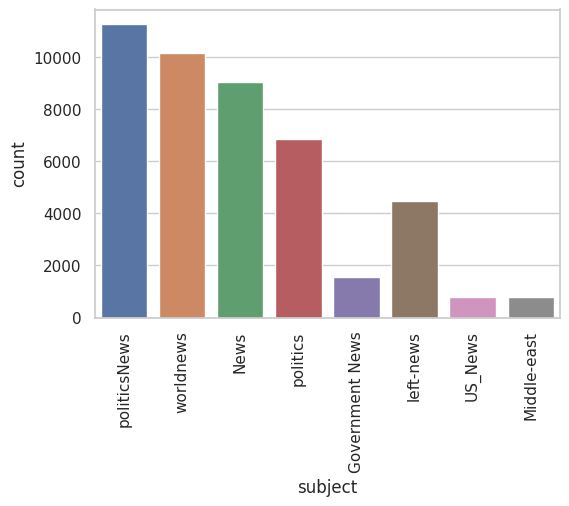

In [7]:
plt.figure(figsize = (6,4))
sns.set(style = "whitegrid",font_scale = 1.0)
chart = sns.countplot(x = "subject", data = data)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [8]:
data['text'] = data['title'] +' '+data['text']
# Either you could data.drop["column names"] or del data["column names"]
del data['title']
del data['subject']
del data['date']

In [9]:
data.head()

,text,label
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [10]:
data.shape

(44898, 2)

In [11]:
data.isnull().sum() 

text     0
label    0
dtype: int64

In [12]:
data = data.sample(frac=1).reset_index(drop=True)
data

,text,label
0,"ACTRESS ACCUSES Weinstein Buddy, Actor GEORGE ...",0
1,KARMA: Wikileaks Turns On Donald Trump After ...,0
2,"Meet David French, The Independent Who Republ...",0
3,Watch Trump Shove Foreign Leader Out Of The W...,0
4,"In Cuba visit, Colorado governor sees governme...",1
...,...,...
44893,"Nine killed, others injured in minibus crash i...",1
44894,U.S. to unveil revised self-driving car guidel...,1
44895,NEW BLACK PANTHER LEADER: Trump Is Right…Asks ...,0
44896,Trump BANS Campaign Volunteers From Talking A...,0


<Axes: xlabel='label', ylabel='count'>

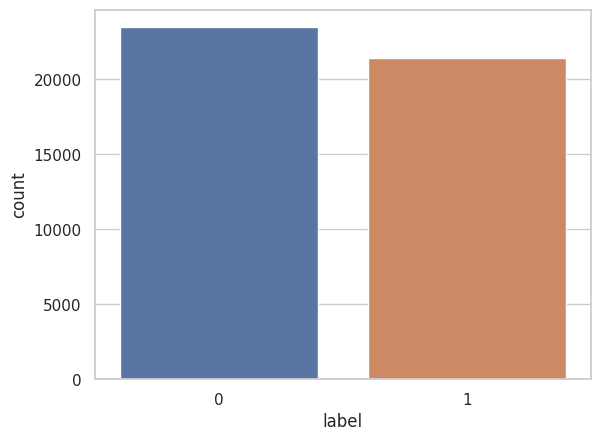

In [13]:
sns.countplot(data=data,
              x='label',
              order=data['label'].value_counts().index)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/u194240/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


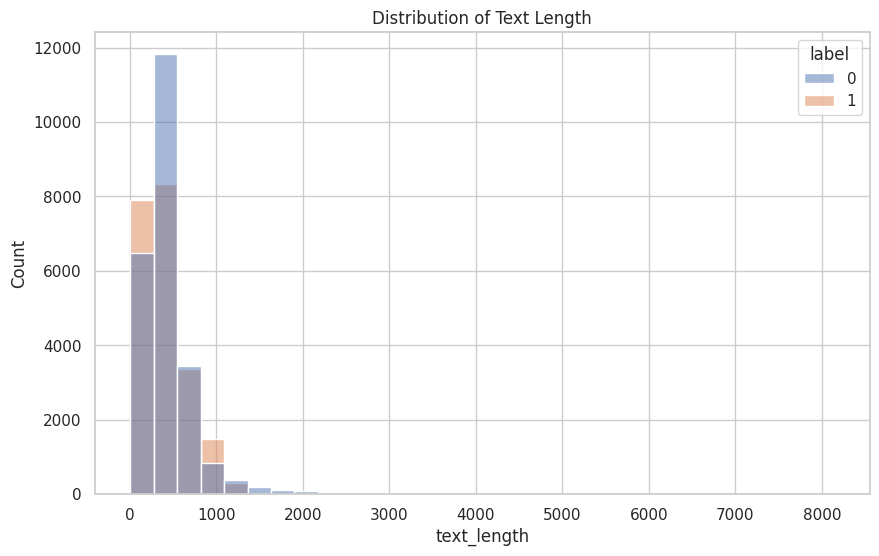

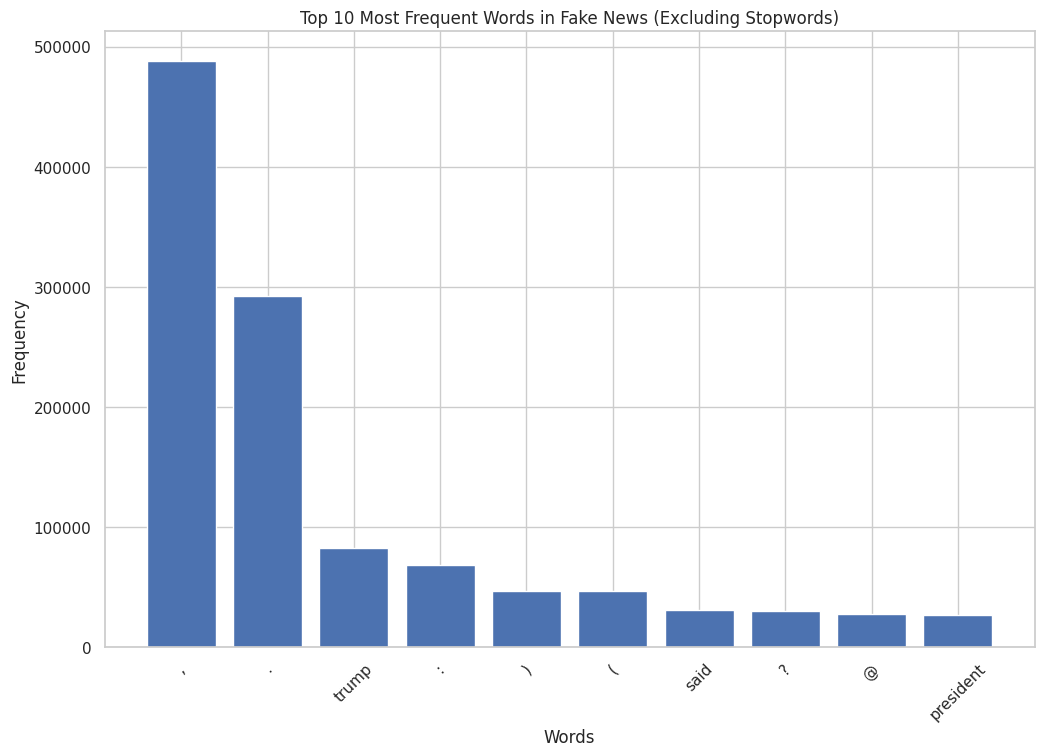

In [14]:
import matplotlib.pyplot as plt
import nltk
from collections import Counter



import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Download the stopwords from nltk
nltk.download('stopwords')

# List of English Stopwords
english_stopwords = set(stopwords.words('english'))

# Calculate the length of the text in words
data["text_length"] = data["text"].apply(lambda text: len(text.split()))

# Displaying the text length distribution for both fake and real news
plt.figure(figsize=(10,6))
sns.histplot(data, x='text_length', hue='label', bins=30)
plt.title('Distribution of Text Length')
plt.show()

# Prepare the text for frequency analysis

# Tokenize and lower case the fake texts
fake_text = ' '.join(data[data['label'] == 0]['text'])
fake_words = nltk.word_tokenize(fake_text.lower())

# Exclude stopwords from the list of tokens
filtered_fake_words = [word for word in fake_words if word not in english_stopwords]

# Count the frequency of the words
word_freq = Counter(filtered_fake_words)

# Get the 10 most common words and their counts
most_common_words = word_freq.most_common(10)

# Extract the words and their frequencies
words, frequencies = zip(*most_common_words)

# Plot the bar chart
plt.figure(figsize=(12,8))
plt.bar(words, frequencies)
plt.title('Top 10 Most Frequent Words in Fake News (Excluding Stopwords)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [16]:
def preprocess_text(text):
    text=text.lower()
    text=re.sub(r"@\S+","",text) #removing @
    text=re.sub("http[s]?\://\S+","",text) #removing links
    text=re.sub(r"#\S+","",text) #removing #
    text=re.sub(r'[^\w\s]','',text) #removing non-words and whitespaces
    text=re.sub(r"[0-9]","",text) #removing numbers
    text=re.sub(r"\n","",text) #removing \n
    text=text.split()
    text=[ps.stem(word) for word in text if not word in stopwords.words('english')]
    text=' '.join(text)
    return text

In [17]:
data['text'] = data['text'].apply(preprocess_text)

In [18]:
data

,text,label,text_length
0,actress accus weinstein buddi actor georg cloo...,0,375
1,karma wikileak turn donald trump administr thr...,0,346
2,meet david french independ republican recruit ...,0,484
3,watch trump shove foreign leader way get front...,0,408
4,cuba visit colorado governor see govern desir ...,1,421
...,...,...,...
44893,nine kill other injur minibu crash central bul...,1,235
44894,us unveil revis selfdriv car guidelin sourc wa...,1,411
44895,new black panther leader trump rightask black ...,0,504
44896,trump ban campaign volunt talk forev campaign ...,0,350


In [19]:
X=data['text']
Y=data['label']

In [20]:
X

0        actress accus weinstein buddi actor georg cloo...
1        karma wikileak turn donald trump administr thr...
2        meet david french independ republican recruit ...
3        watch trump shove foreign leader way get front...
4        cuba visit colorado governor see govern desir ...
                               ...                        
44893    nine kill other injur minibu crash central bul...
44894    us unveil revis selfdriv car guidelin sourc wa...
44895    new black panther leader trump rightask black ...
44896    trump ban campaign volunt talk forev campaign ...
44897    eu say understand aim us strike syria brussel ...
Name: text, Length: 44898, dtype: object

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(X)

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1681: RuntimeWarning: divide by zero encountered in divide
  idf = np.log(n_samples / df) + 1


In [22]:
print(X)

  (0, 122044)	0.024989668520687902
  (0, 65213)	0.08284655880060064
  (0, 142768)	0.06886118104902633
  (0, 18227)	0.075407124022336
  (0, 166211)	0.04567650894744773
  (0, 75447)	0.0286861134317048
  (0, 47737)	0.028411449740603622
  (0, 29600)	0.03916385336082886
  (0, 87363)	0.09128220836460038
  (0, 170148)	0.08880799061304297
  (0, 43542)	0.04959709715351542
  (0, 23253)	0.038867821257657816
  (0, 124963)	0.03027518246712934
  (0, 76031)	0.173777676453725
  (0, 98925)	0.1229500986047775
  (0, 7289)	0.09470204699666722
  (0, 21499)	0.02727452010243924
  (0, 64174)	0.049756160331405
  (0, 90541)	0.04035350669662374
  (0, 711)	0.036853492323638826
  (0, 131474)	0.02270611471053957
  (0, 58834)	0.07376394808753552
  (0, 147441)	0.06879217328078323
  (0, 89888)	0.045291735045184287
  (0, 33436)	0.04888447535525671
  :	:
  (44897, 145182)	0.10548918164737539
  (44897, 159512)	0.14894427512028807
  (44897, 30223)	0.08172534807389763
  (44897, 46706)	0.18584111374638454
  (44897, 127389)	

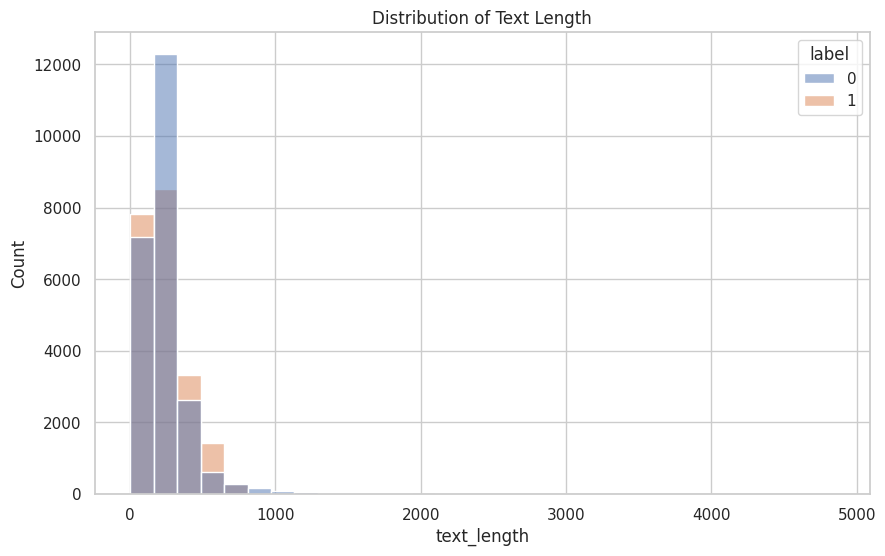

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/u194240/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


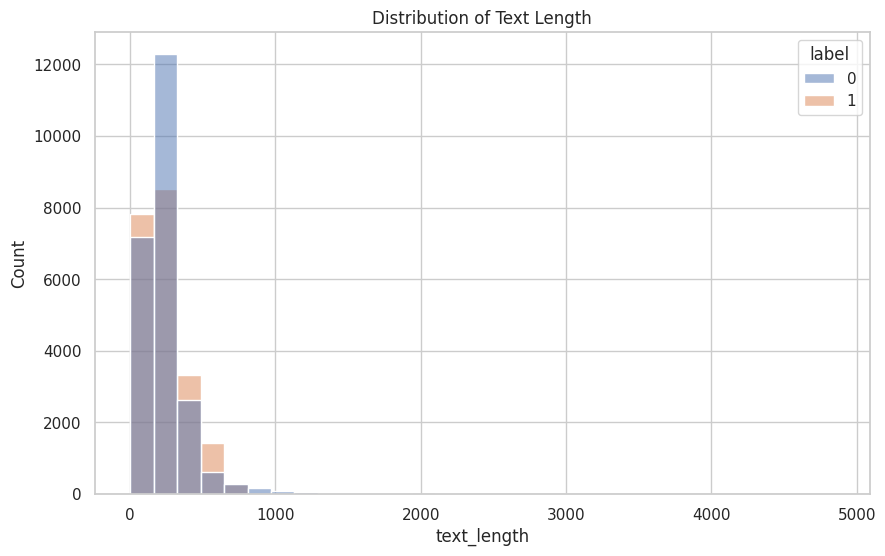

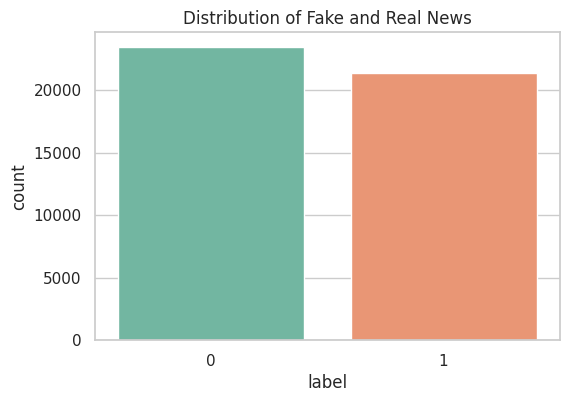

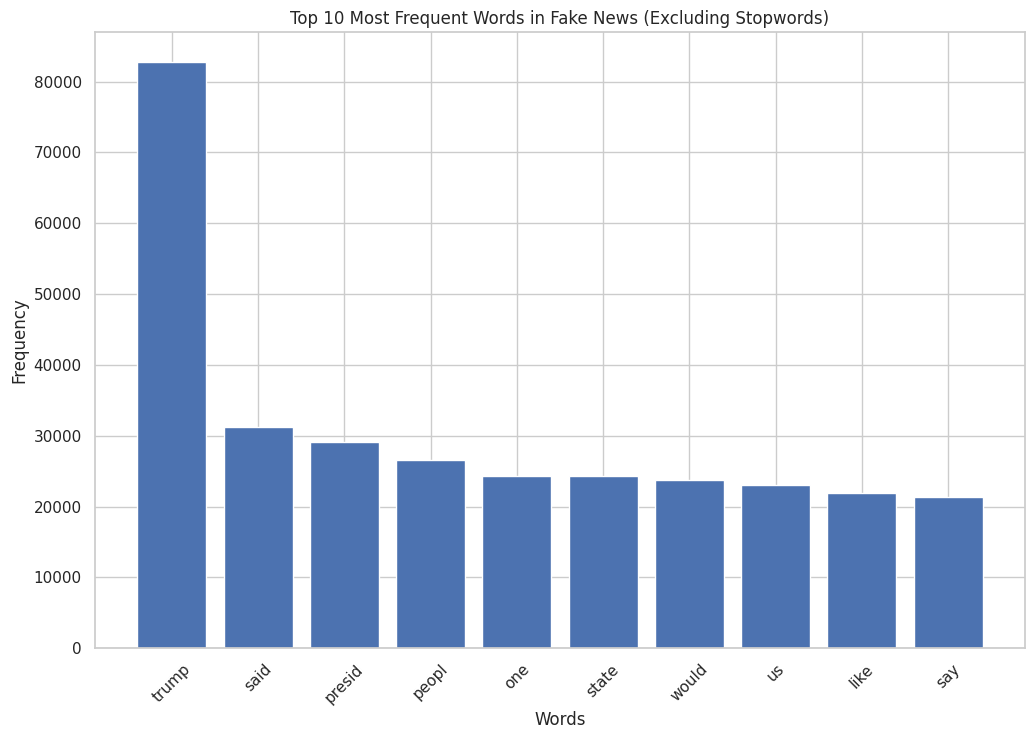

In [23]:
import matplotlib.pyplot as plt
import nltk
from collections import Counter

# Calculate the length of the text in words
data["text_length"] = data["text"].apply(lambda text: len(text.split()))

# Displaying the text length distribution for both fake and real news
plt.figure(figsize=(10,6))
sns.histplot(data, x='text_length', hue='label', bins=30)
plt.title('Distribution of Text Length')
plt.show()



import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Download the stopwords from nltk
nltk.download('stopwords')

# List of English Stopwords
english_stopwords = set(stopwords.words('english'))

# Calculate the length of the text in words
data["text_length"] = data["text"].apply(lambda text: len(text.split()))

# Displaying the text length distribution for both fake and real news
plt.figure(figsize=(10,6))
sns.histplot(data, x='text_length', hue='label', bins=30)
plt.title('Distribution of Text Length')
plt.show()

# Displaying the distribution of labels in the dataset
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=data, palette="Set2")
plt.title('Distribution of Fake and Real News')
plt.show()

# Prepare the text for frequency analysis

# Tokenize and lower case the fake texts
fake_text = ' '.join(data[data['label'] == 0]['text'])
fake_words = nltk.word_tokenize(fake_text.lower())

# Exclude stopwords from the list of tokens
filtered_fake_words = [word for word in fake_words if word not in english_stopwords]

# Count the frequency of the words
word_freq = Counter(filtered_fake_words)

# Get the 10 most common words and their counts
most_common_words = word_freq.most_common(10)

# Extract the words and their frequencies
words, frequencies = zip(*most_common_words)

# Plot the bar chart
plt.figure(figsize=(12,8))
plt.bar(words, frequencies)
plt.title('Top 10 Most Frequent Words in Fake News (Excluding Stopwords)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [25]:
#Logistic Regression

In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9858351893095768

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5943
           1       0.98      0.99      0.98      5282

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



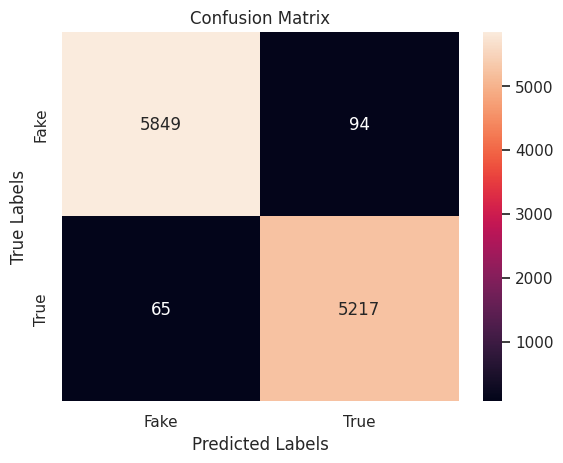

In [29]:
from sklearn.metrics import confusion_matrix
def cf_matrix(y_test, y_pred):
    cf = confusion_matrix(y_test, y_pred)
    classes = ['Fake' , 'True']
    sns.heatmap(cf, annot = True, xticklabels = classes, yticklabels = classes, fmt ='g')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
cf_matrix(y_test, y_pred)

In [30]:
#Naive Bayes

In [31]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [32]:
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9366592427616927

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5943
           1       0.93      0.94      0.93      5282

    accuracy                           0.94     11225
   macro avg       0.94      0.94      0.94     11225
weighted avg       0.94      0.94      0.94     11225



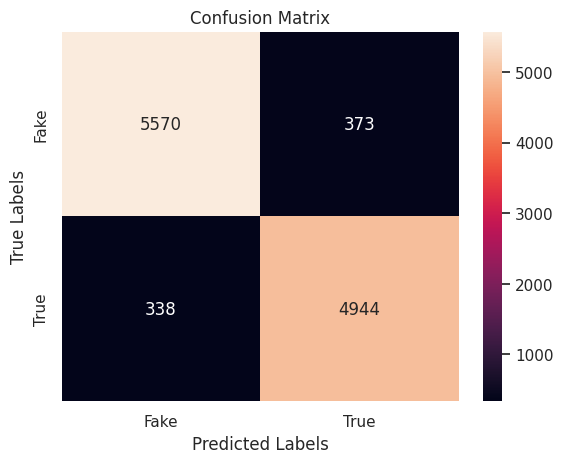

In [34]:
cf_matrix(y_test, y_pred)

In [35]:
#SVC

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
model = SVC()
model.fit(X_train,y_train)
# params=[{
#     'C':[1.0,2.0,3.0],
#     'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
#     'degree':[2,3,4,5]
# }]

SVC()

In [37]:
# gs_svc=GridSearchCV(model,param_grid=params,scoring='accuracy',cv=14)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9929621380846325

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5943
           1       0.99      0.99      0.99      5282

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



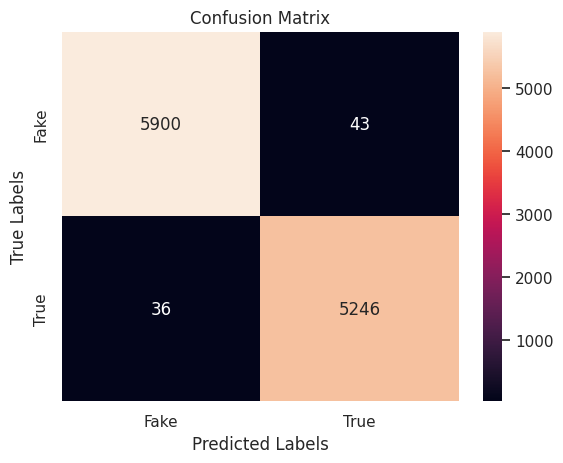

In [39]:
cf_matrix(y_test, y_pred)

In [40]:
#Decision Tree(CART)

In [41]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred)

0.9959910913140312

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5943
           1       1.00      1.00      1.00      5282

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



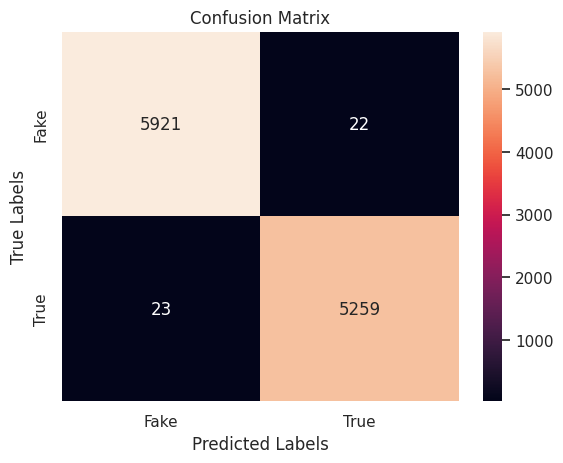

In [44]:
cf_matrix(y_test, y_pred)

In [45]:
#Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9882405345211581

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5943
           1       0.99      0.99      0.99      5282

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



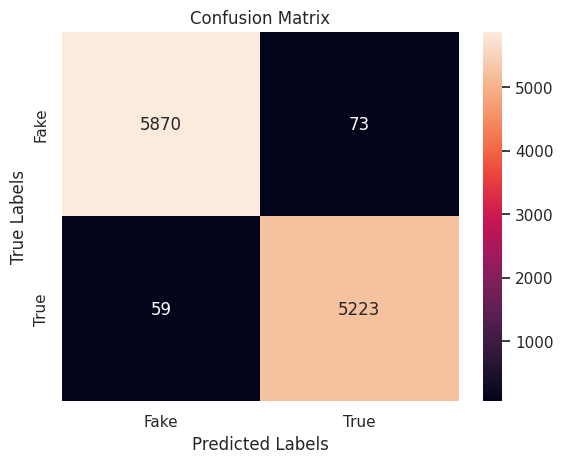

In [48]:
cf_matrix(y_test, y_pred)

In [49]:
#Passive Aggressive classifier

In [50]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa_classifier=PassiveAggressiveClassifier()
pa_classifier.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [51]:
y_pred=pa_classifier.predict(X_test) 
accuracy_score(y_test,y_pred)

0.9942984409799555

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5943
           1       0.99      0.99      0.99      5282

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



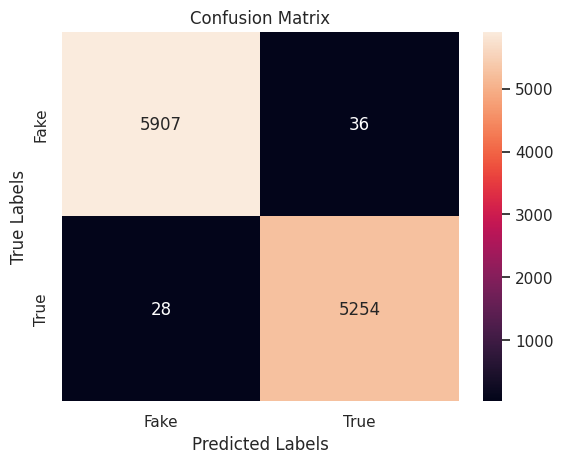

In [53]:
cf_matrix(y_test, y_pred)

In [54]:
#Ensemble Learning

In [55]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
svm_classifier = SVC(probability=True)
nb_classifier = MultinomialNB()
dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
nb_classifier.fit(X_train, y_train)

# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('decision_tree', dt_classifier),
        ('random_forest', rf_classifier),
        ('svm', svm_classifier),
        ('naive_bayes', nb_classifier)
    ],
    voting='soft'  # Use soft voting for probabilistic classifiers
)

# Fit the ensemble model to the training data
ensemble_model.fit(X_train, y_train)

# Make predictions on the test data
ensemble_predictions = ensemble_model.predict(X_test)

# Calculate the accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Model Accuracy:", ensemble_accuracy)

# Print confusion matrix for each model

#     cm = confusion_matrix(y_test, pred)
#     print(f"\nConfusion Matrix for {model_name}:")
#     print(cm)

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for t

Ensemble Model Accuracy: 0.9949220489977728


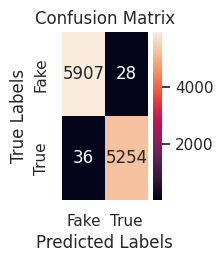

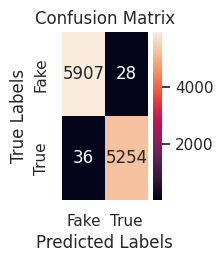

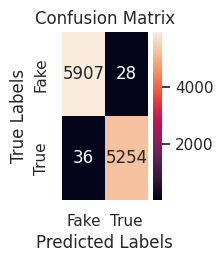

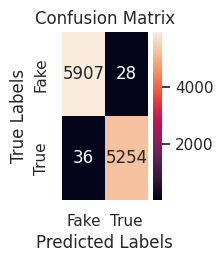

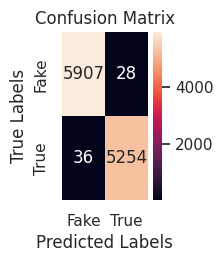

In [57]:
i = 1
for model in (dt_classifier, rf_classifier, svm_classifier, nb_classifier, ensemble_model):
    model_name = model.__class__.__name__
    pred = model.predict(X_test)
    plt.subplot(2, 4, i)
    cf_matrix(y_pred, y_test)
    i += 1

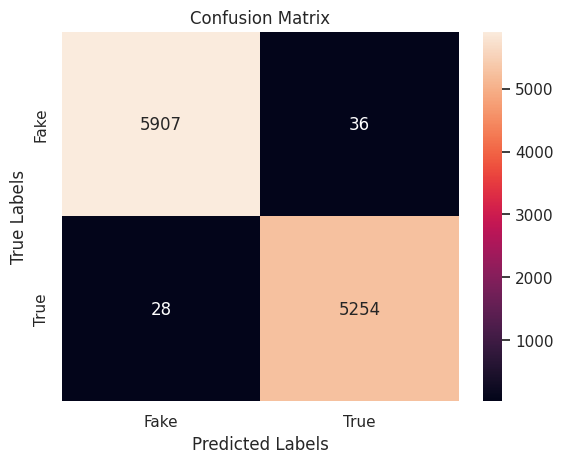

In [58]:
cf_matrix(y_test, y_pred)

In [59]:
#Ada Boost

In [60]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train, y_train)

AdaBoostClassifier()

In [61]:
y_pred=model.predict(X_test) 
accuracy_score(y_test,y_pred)

0.9942984409799555

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5943
           1       0.99      1.00      0.99      5282

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



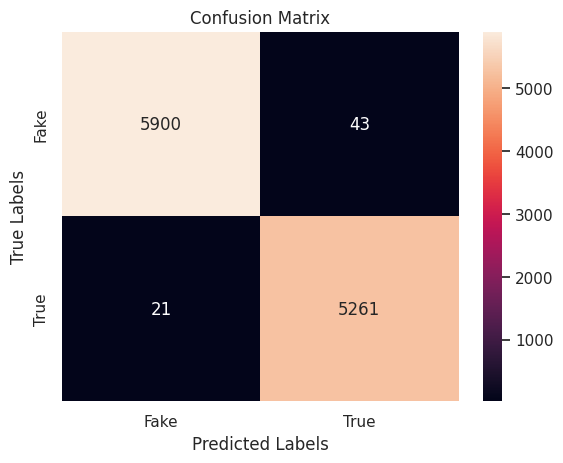

In [63]:
cf_matrix(y_test, y_pred)